<a href="https://colab.research.google.com/github/Meghanah97/Individual_project_bike_sharing_demand_prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size="+3" color='#053c96'><b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b></font>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

#<font size="+3" color='#053c96'><b> The Structure of this notebook</b></font>

#**Project Work flow**

---

1. Importing Libraries

2. Loading the Dataset

3. EDA on features 

4. Feature Engineering

5. Data Cleaning

6. Feature selection

7. Fitting the regression models and HyperParameter Tuning

8. Comparison of Models

9. Final selection of the model

10. Conclusion

---
##<font size="+2" color='#053c96'><b> Installing and Importing Libraries</b></font>

### Libraries used in this Project:

Datawrangling : 
* Numpy
* Pandas

For Graphing : 
* Matplotib
* Seaborn 

Machine learning :
* Scikit-Learn
* SK-Opt
* XGBoost
* CatBoost

Miscellaneous :
* Google colab tools

# Importing few libraries

In [1]:
#import statements
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import  mean_absolute_error
from sklearn.metrics import  log_loss

from datetime import datetime
import datetime as dt

import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_df=pd.read_csv('/content/SeoulBikeData.csv',encoding='latin')

In [3]:
#data copy
data=bike_df.copy()

<b> <font size="+3" color='#053c96'><b> Dataset Information: </b></font>

In [4]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [7]:
data.describe(percentiles = [.25,.50,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,2043.000,2526.23,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,22.000,23.00,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,30.700,35.10,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,94.000,97.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,3.700,4.70,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.000,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,22.405,24.70,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,2.560,3.17,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,0.400,4.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,0.200,2.50,8.80


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#**Data Preprocessing and Feature Engineering**

# Formatting Datetime type:

In [9]:
# importing Datetime
from datetime import datetime
import calendar
# Setting the Datetime formate: 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2022-12-20'

In [11]:
data['Date']=data['Date'].apply(lambda x: dt.datetime.strptime(x,"%d/%m/%Y"))

In [12]:
data['year']=data['Date'].dt.year
data['month']=data['Date'].dt.month
data['day']=data['Date'].dt.day_name()

In [13]:
#creating a new column of weekend_weekdays and dropping unnecessary columns
data['weekdays_weekend']=data['day'].apply(lambda x :1 if x=='Saturday' or x=='Sunday' else 0)
data=data.drop(columns=['Date','day','year'],axis=1)

In [15]:
data['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

In [14]:
#checking unique values
data.nunique()

Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
month                          12
weekdays_weekend                2
dtype: int64

In [ ]:
#checking duplicate value
Dup=len(data[data.duplicated()])
print("Number of duplicate value is=",Dup)

Number of duplicate value is= 0


In [ ]:
#checking null values
data.isna().sum()
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# Changing Data type:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [17]:
cols=['Hour','month','weekdays_weekend']
for i in cols:
  data[i]=data[i].astype('category')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Rented Bike Count          8760 non-null   int64   
 1   Hour                       8760 non-null   category
 2   Temperature(°C)            8760 non-null   float64 
 3   Humidity(%)                8760 non-null   int64   
 4   Wind speed (m/s)           8760 non-null   float64 
 5   Visibility (10m)           8760 non-null   int64   
 6   Dew point temperature(°C)  8760 non-null   float64 
 7   Solar Radiation (MJ/m2)    8760 non-null   float64 
 8   Rainfall(mm)               8760 non-null   float64 
 9   Snowfall (cm)              8760 non-null   float64 
 10  Seasons                    8760 non-null   object  
 11  Holiday                    8760 non-null   object  
 12  Functioning Day            8760 non-null   object  
 13  month                      8760 n

In [19]:
#renaming column names
data=data.rename(columns={'Rented Bike Count':'Rented_bike_count',
                                'Humidity(%)':'Humidity',
                                'Temperature(°C)':'Temperature',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_day'})

#**Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

#**Univariate Analysis**

 Univariate analysis is the technique of comparing and analyzing the dependency of a single predictor and a response variable. The prefix "uni" means one, emphasizing the fact that the analysis only accounts for one variable's effect on a dependent variable

#**Analysis of dependent variables**

A dependent variable is the variable that changes as a result of the independent variable manipulation. It's the outcome you're interested in measuring, and it “depends” on your independent variable. In statistics, dependent variables are also called: Response variables (they respond to a change in another variable)

#**Analysis of categorical variables**

Categorical data analysis is the analysis of data where the response variable has been grouped into a set of mutually exclusive ordered (such as age group) or unordered (such as eye color) categories.

##**Visualization**

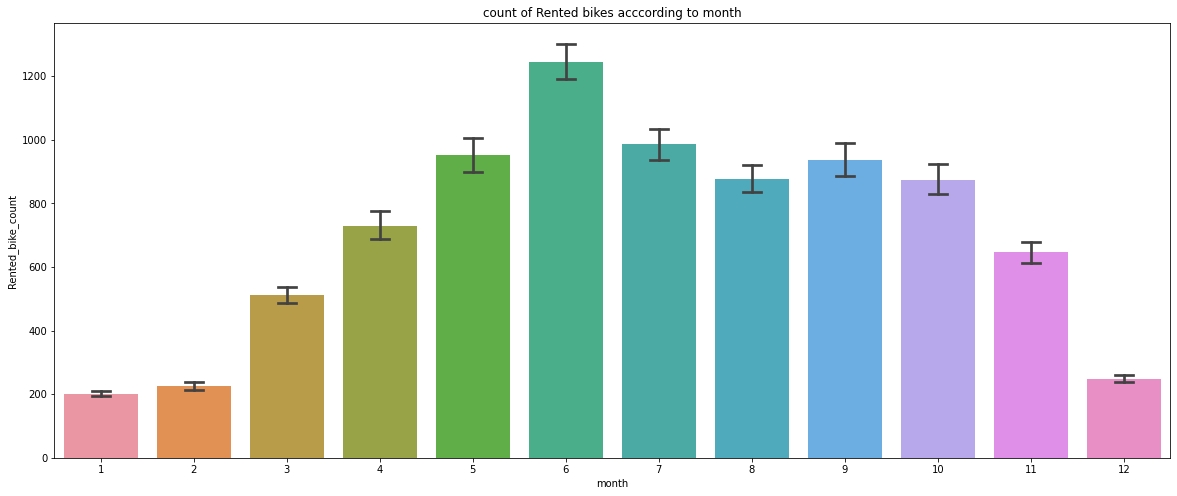

In [20]:
#month
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='month',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to month');

# Comment
From barplot we can say that month 5 to 10 the demand of the rented bike is high and these months comes between summer season.

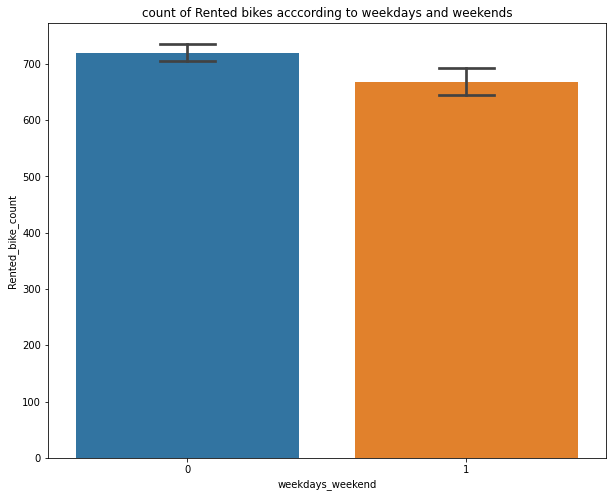

In [21]:
#week and weekends
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='weekdays_weekend',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to weekdays and weekends');

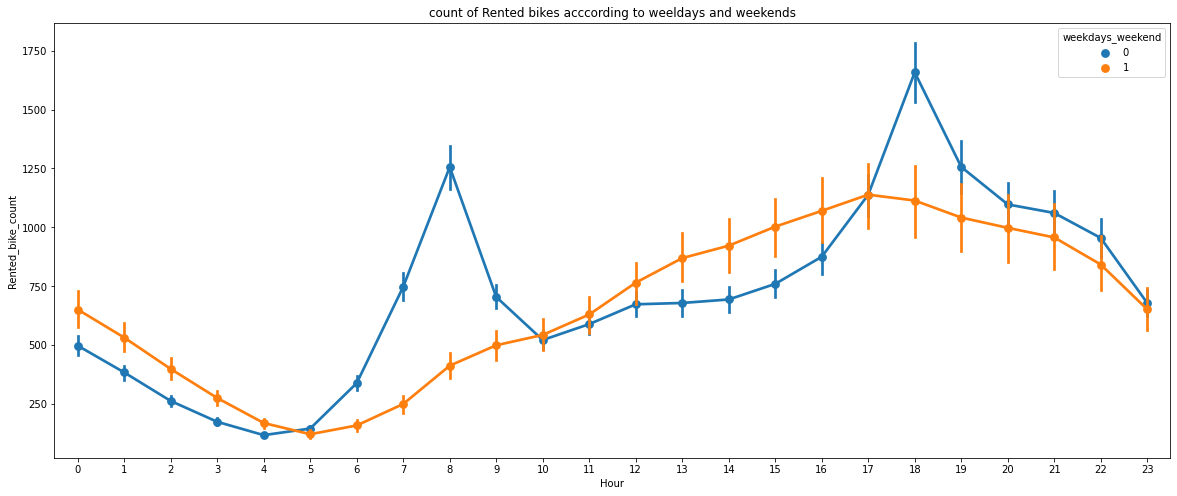

In [22]:
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_bike_count',hue='weekdays_weekend',ax=ax)
ax.set(title='count of Rented bikes acccording to weeldays and weekends');

# comment
From above plots we can say that in weekdays which represents blue color ,the demand of bike are higher and even higher between 7am to 9am and 5pm to 7pm. The orange color represents the weekend days, and it show that demand of rented bikes are low in morning hour but after 4pm demand slightly increases.

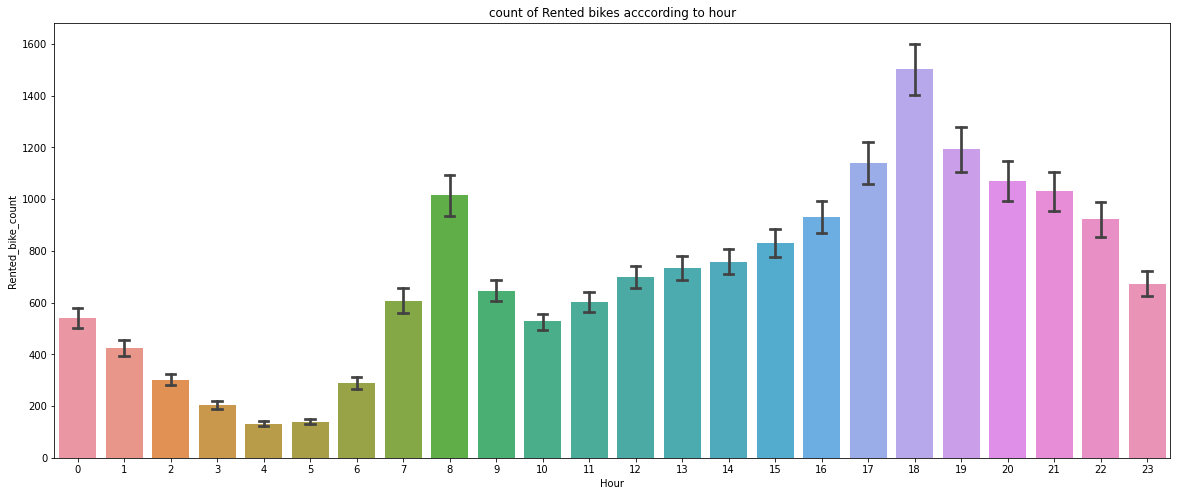

In [23]:
#hour
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Hour',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to hour');

# comment
From above plot we can say that use of rented bike between 7am to 9am and 5pm to 7pm

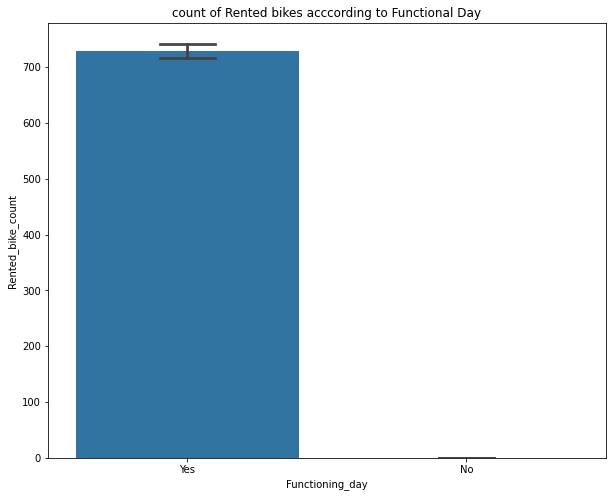

In [24]:
#functiona day
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=data,x='Functioning_day',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to Functional Day');

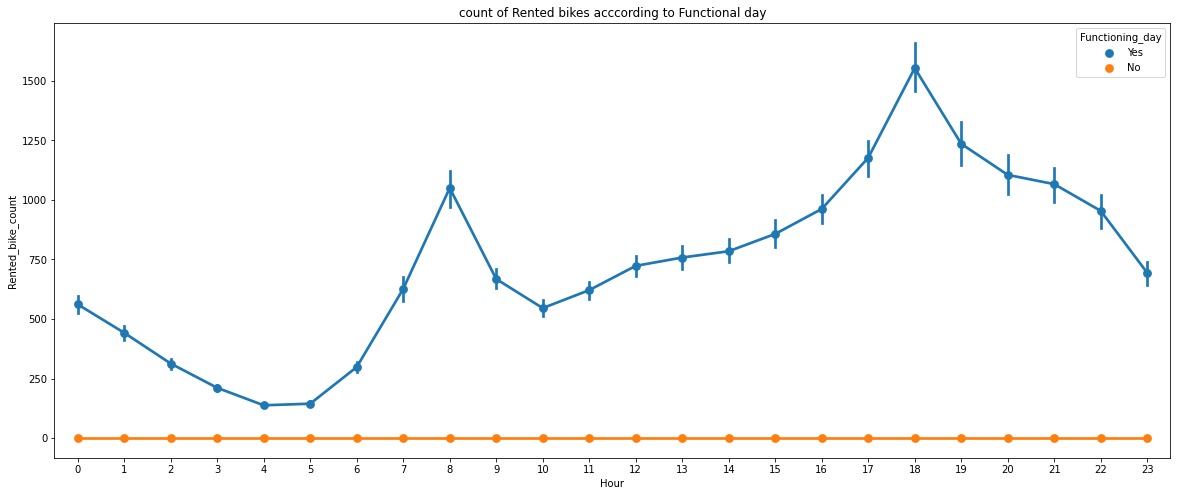

In [25]:
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_bike_count',hue='Functioning_day',ax=ax)
ax.set(title='count of Rented bikes acccording to Functional day');

# comment
From above plot it shows that use of rented bike in functioning day or nt ,people dont use rented bikes in non-functioning day

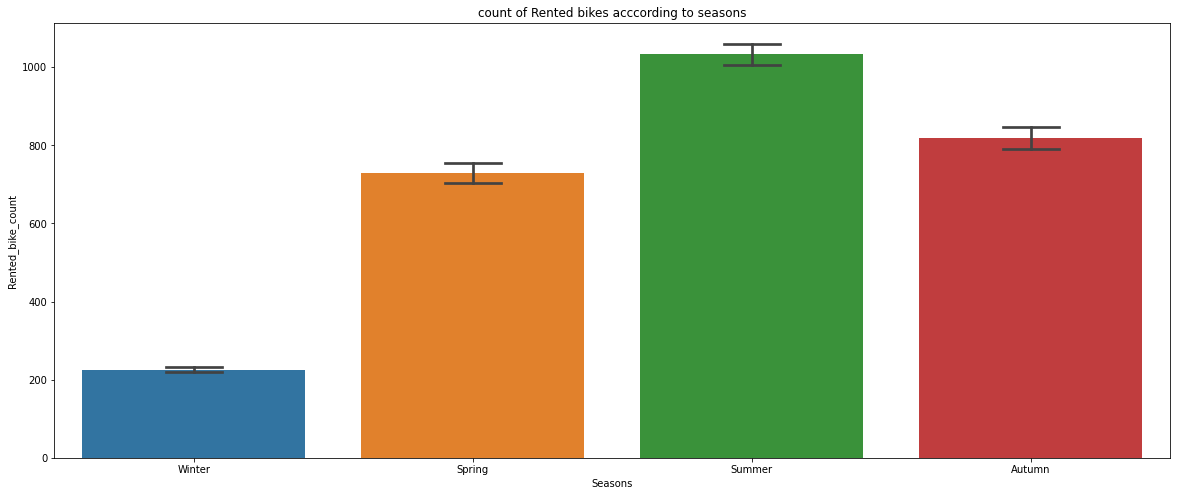

In [26]:
#Seasons
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Seasons',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to seasons');

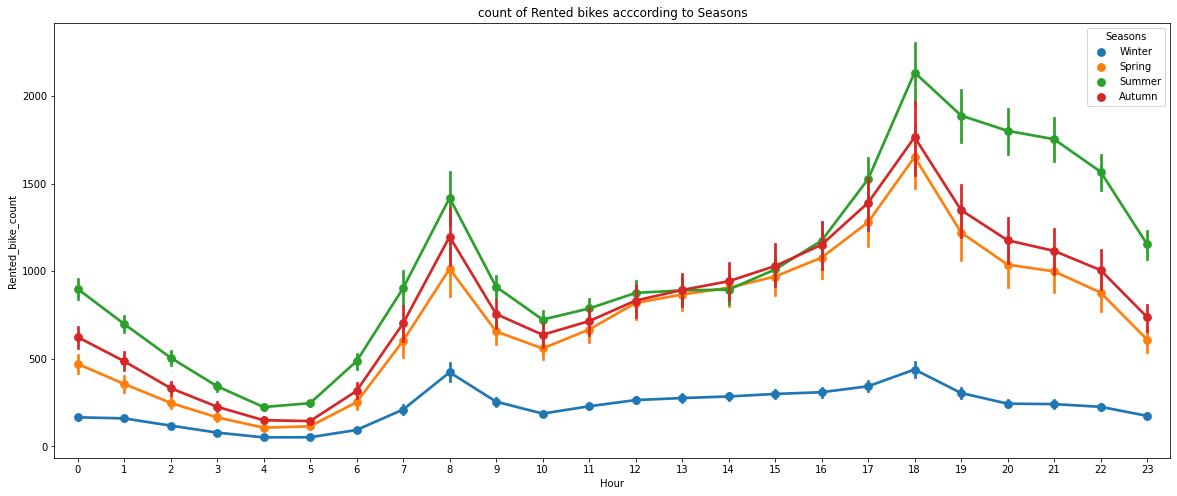

In [27]:
#aanlyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_bike_count',hue='Seasons',ax=ax)
ax.set(title='count of Rented bikes acccording to Seasons');

# comment
From above plot it shows use of rented bike in all four season,in summer season use of rented bike is more likely between 7am to 9am and 7pm to 5pm, In winter season use of rented bike is very low due to rain and snowfall

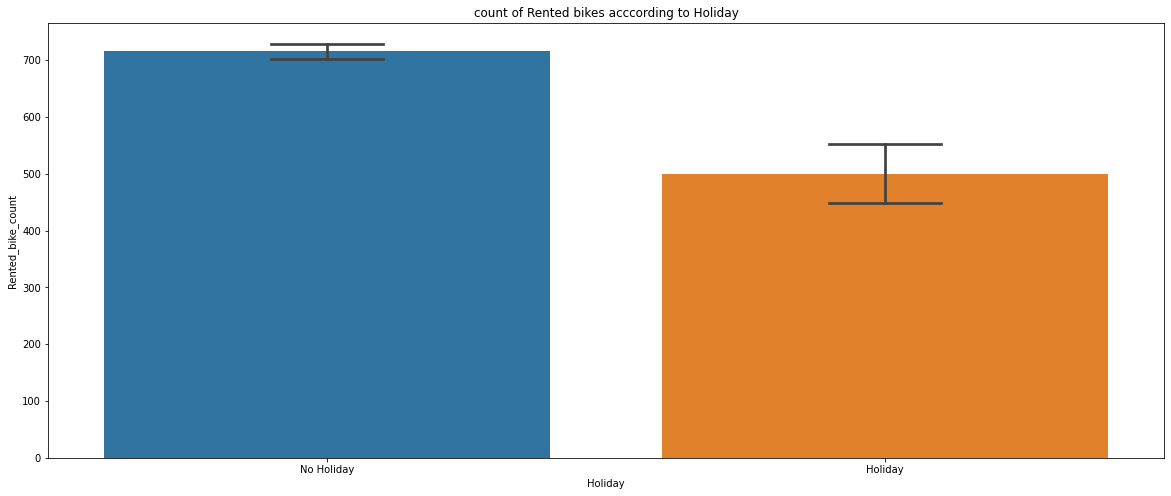

In [28]:
#Holiday
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.barplot(data=data,x='Holiday',y='Rented_bike_count',ax=ax,capsize=.2)
ax.set(title='count of Rented bikes acccording to Holiday');

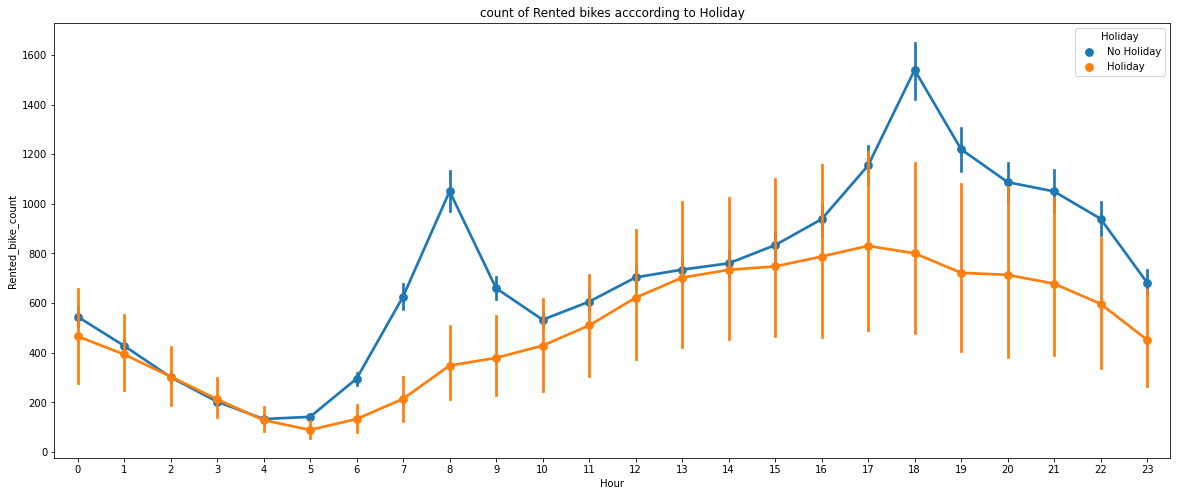

In [29]:
#analyzing of data by visualization
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=data,x='Hour',y='Rented_bike_count',hue='Holiday',ax=ax)
ax.set(title='count of Rented bikes acccording to Holiday');

# comment
From the above plot shows that use of rented bikes in holidays, we can say that use of rented bike between 2pm to 8pm

# Analyze Numerical variables

In [ ]:
#